In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Projeto Série Temporal - DAEE

Iremos utilizar os dados referente ao **Departamento de Águas e Energia Elétrica** ([DAEE](http://www.hidrologia.daee.sp.gov.br/)), no município de São Paulo com o período 1985 a 2022. O objetivo será criar uma série temporal para prever, utilizando modelos, novas chuvas após 2022. Fazer previsões com dados climáticos é um processo complicado, implica em diversas variáveis e, com a mudança de uma variável, pode ocorrer diversas mudanças nos dados, porém, é importante trabalhar nessas dificuldades e trazer soluções ao caso.

Parâmetros utilizados para colher os dados no site:

**Prefixo**: E3-262 <br>
**Nome do posto**: Guarau <br>
**Município**: São Paulo <br>
**Curso d'água**: Cabucu de baixo, r/(Itagaucu,Cor) <br>
**Latitude**: 23°26'33"<br>
**Longitude**: 46°39'01"<br>
**Dados de**: 1985 a 2022 <br>

## Tratamento Inicial

In [523]:
dados = pd.read_csv('DAEE_Chuva.csv', sep=';')
dados

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,"184,9","242,9",230,59,"126,2","14,6",4,"21,8","126,1","71,1","111,3","155,2"
1,1986,"199,6",221,"218,7","106,5","113,1","3,9","30,3",---,"34,5","60,7","242,5","389,9"
2,1987,"525,8",---,"161,3","98,1","293,8","183,9","11,8","30,9","80,2","84,8","72,7","152,1"
3,1988,"268,7","224,4","189,2","175,1","224,9","58,6","1,3","0,2","28,4","173,9","100,2","289,8"
4,1989,"312,9","344,3","288,2","66,3","21,7","52,5","150,1","32,9","52,1","80,1",88,"236,7"
5,1990,"284,1","196,9","310,1","85,8","77,9","50,6","121,2","76,3","97,2","206,8","116,3","149,8"
6,1991,"330,7","340,3","522,4","200,3","43,3","96,8","28,2","37,3","101,4",168,"67,3","237,9"
7,1992,"129,2","258,5",---,"87,2","93,5","11,6","40,9","24,7","150,6","219,6",---,"211,7"
8,1993,"221,5","225,7",110,"84,6","133,9","74,7","11,2","40,8","210,1","134,1","125,5","170,5"
9,1994,"196,9","184,4","231,6","111,4","54,9","30,5","39,2","2,4","1,8","147,6","86,6","276,3"


É possível observar que há valores não preenchidos, como "---". Também é possível perceber que a separação da parte inteira da parte decimal é feita com a vírgula (,), porém, no Python, é utilizado o ponto (.), portanto, devemos transformar todos os valores.

In [524]:
dados.shape

(39, 13)

Vamos excluir a última linha, uma vez que podemos conseguir as médias dos respectivos meses através de funções do próprio Python:

In [525]:
dados = dados.drop(38)

Existem 39 registros, ou linhas, e 13 variáveis (meses), ou colunas, no nosso DataFrame.

### Análise dos tipos de atributos

**`object`**: do tipo string <br>
**`int64`**: do tipo inteiro <br>
**`float64`**: do tipo reais <br>
**`complex`**: do tipo complexos <br>

In [526]:
dados.dtypes

Ano          object
Janeiro      object
Fevereiro    object
Março        object
Abril        object
Maio         object
Junho        object
Julho        object
Agosto       object
Setembro     object
Outubro      object
Novembro     object
Dezembro     object
dtype: object

Todas as variáveis são do tipo `object`, isto é, variáveis categóricas, strings, ela deve ser uma variável numérica, ou seja, float64, que é a dos números reais.

Vamos converter as vírgulas em pontos:

In [527]:
for i in dados:
    dados[i] = dados[i].str.replace(',', '.')
dados

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.9,242.9,230,59,126.2,14.6,4,21.8,126.1,71.1,111.3,155.2
1,1986,199.6,221,218.7,106.5,113.1,3.9,30.3,---,34.5,60.7,242.5,389.9
2,1987,525.8,---,161.3,98.1,293.8,183.9,11.8,30.9,80.2,84.8,72.7,152.1
3,1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.2,28.4,173.9,100.2,289.8
4,1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.9,52.1,80.1,88,236.7
5,1990,284.1,196.9,310.1,85.8,77.9,50.6,121.2,76.3,97.2,206.8,116.3,149.8
6,1991,330.7,340.3,522.4,200.3,43.3,96.8,28.2,37.3,101.4,168,67.3,237.9
7,1992,129.2,258.5,---,87.2,93.5,11.6,40.9,24.7,150.6,219.6,---,211.7
8,1993,221.5,225.7,110,84.6,133.9,74.7,11.2,40.8,210.1,134.1,125.5,170.5
9,1994,196.9,184.4,231.6,111.4,54.9,30.5,39.2,2.4,1.8,147.6,86.6,276.3


Checando quantos valores estão ausentes:

In [528]:
aux = 0
for i in dados:
    aux = aux + (dados[(dados[i] == "---") | (dados[i] == '0')][i].count())
    
print((aux/(((dados.shape[0])*(dados.shape[1]-1))))*100) # Como não dá pra visualizar mês a mês, vamos apenas pegar todos os meses (-1 pois a primeira coluna é os anos)

4.605263157894736


Os valores ausentes ("---" e zeros) representam 4,60% do nosso DataFrame. Vamos substituir esses valores ausentes pela média do mês e transformar em uma variável numérica:

In [529]:
for i in dados.columns:
    try:
        media = pd.to_numeric(dados[i], errors='coerce').mean()
        dados[i] = pd.to_numeric(dados[i].replace(['---', '0'], str(media)))
        
    except:
        print(f'Erro na coluna: {i}')

In [530]:
dados

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,1985,184.900000,242.900000,230.000000,59.0,126.2,14.600000,4.000000,21.800000,126.100000,71.100000,111.300,155.200000
1,1986,199.600000,221.000000,218.700000,106.5,113.1,3.900000,30.300000,28.561765,34.500000,60.700000,242.500,389.900000
2,1987,525.800000,249.322222,161.300000,98.1,293.8,183.900000,11.800000,30.900000,80.200000,84.800000,72.700,152.100000
3,1988,268.700000,224.400000,189.200000,175.1,224.9,58.600000,1.300000,0.200000,28.400000,173.900000,100.200,289.800000
4,1989,312.900000,344.300000,288.200000,66.3,21.7,52.500000,150.100000,32.900000,52.100000,80.100000,88.000,236.700000
5,1990,284.100000,196.900000,310.100000,85.8,77.9,50.600000,121.200000,76.300000,97.200000,206.800000,116.300,149.800000
6,1991,330.700000,340.300000,522.400000,200.3,43.3,96.800000,28.200000,37.300000,101.400000,168.000000,67.300,237.900000
7,1992,129.200000,258.500000,228.130556,87.2,93.5,11.600000,40.900000,24.700000,150.600000,219.600000,145.475,211.700000
8,1993,221.500000,225.700000,110.000000,84.6,133.9,74.700000,11.200000,40.800000,210.100000,134.100000,125.500,170.500000
9,1994,196.900000,184.400000,231.600000,111.4,54.9,30.500000,39.200000,2.400000,1.800000,147.600000,86.600,276.300000




Checando o tipo das variáveis agora:

In [531]:
dados.dtypes

Ano            int64
Janeiro      float64
Fevereiro    float64
Março        float64
Abril        float64
Maio         float64
Junho        float64
Julho        float64
Agosto       float64
Setembro     float64
Outubro      float64
Novembro     float64
Dezembro     float64
dtype: object

Todas as variáveis agora estão no formato de números reais.

Por questões comparativas ao modelo no final, vamos excluir a última linha dos nossos dados:

In [532]:
dados = dados.drop(37)
dados.to_csv('DAEE_tratado.csv', index = False)

***
## Criação da Série Temporal

Oque nos interessa é apenas os valores dos meses, vamos excluir a coluna de anos.

In [533]:
dados = dados.drop(columns='Ano')
dados

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,184.900000,242.900000,230.000000,59.0,126.2,14.600000,4.000000,21.800000,126.100000,71.100000,111.300,155.200000
1,199.600000,221.000000,218.700000,106.5,113.1,3.900000,30.300000,28.561765,34.500000,60.700000,242.500,389.900000
2,525.800000,249.322222,161.300000,98.1,293.8,183.900000,11.800000,30.900000,80.200000,84.800000,72.700,152.100000
3,268.700000,224.400000,189.200000,175.1,224.9,58.600000,1.300000,0.200000,28.400000,173.900000,100.200,289.800000
4,312.900000,344.300000,288.200000,66.3,21.7,52.500000,150.100000,32.900000,52.100000,80.100000,88.000,236.700000
5,284.100000,196.900000,310.100000,85.8,77.9,50.600000,121.200000,76.300000,97.200000,206.800000,116.300,149.800000
6,330.700000,340.300000,522.400000,200.3,43.3,96.800000,28.200000,37.300000,101.400000,168.000000,67.300,237.900000
7,129.200000,258.500000,228.130556,87.2,93.5,11.600000,40.900000,24.700000,150.600000,219.600000,145.475,211.700000
8,221.500000,225.700000,110.000000,84.6,133.9,74.700000,11.200000,40.800000,210.100000,134.100000,125.500,170.500000
9,196.900000,184.400000,231.600000,111.4,54.9,30.500000,39.200000,2.400000,1.800000,147.600000,86.600,276.300000


Agora, para ficar formatado em formato de Series, vamos passar os valores de um ano para um array, ou seja, um vetor de dados.

In [534]:
dados = dados.values
dados

array([[1.84900000e+02, 2.42900000e+02, 2.30000000e+02, 5.90000000e+01,
        1.26200000e+02, 1.46000000e+01, 4.00000000e+00, 2.18000000e+01,
        1.26100000e+02, 7.11000000e+01, 1.11300000e+02, 1.55200000e+02],
       [1.99600000e+02, 2.21000000e+02, 2.18700000e+02, 1.06500000e+02,
        1.13100000e+02, 3.90000000e+00, 3.03000000e+01, 2.85617647e+01,
        3.45000000e+01, 6.07000000e+01, 2.42500000e+02, 3.89900000e+02],
       [5.25800000e+02, 2.49322222e+02, 1.61300000e+02, 9.81000000e+01,
        2.93800000e+02, 1.83900000e+02, 1.18000000e+01, 3.09000000e+01,
        8.02000000e+01, 8.48000000e+01, 7.27000000e+01, 1.52100000e+02],
       [2.68700000e+02, 2.24400000e+02, 1.89200000e+02, 1.75100000e+02,
        2.24900000e+02, 5.86000000e+01, 1.30000000e+00, 2.00000000e-01,
        2.84000000e+01, 1.73900000e+02, 1.00200000e+02, 2.89800000e+02],
       [3.12900000e+02, 3.44300000e+02, 2.88200000e+02, 6.63000000e+01,
        2.17000000e+01, 5.25000000e+01, 1.50100000e+02, 3.29

Transformando os valores em uma lista:

In [535]:
dados = list(dados.flatten())
print(dados)

[184.9, 242.9, 230.0, 59.0, 126.2, 14.6, 4.0, 21.8, 126.1, 71.1, 111.3, 155.2, 199.6, 221.0, 218.7, 106.5, 113.1, 3.9, 30.3, 28.56176470588236, 34.5, 60.7, 242.5, 389.9, 525.8, 249.3222222222222, 161.3, 98.1, 293.8, 183.9, 11.8, 30.9, 80.2, 84.8, 72.7, 152.1, 268.7, 224.4, 189.2, 175.1, 224.9, 58.6, 1.3, 0.2, 28.4, 173.9, 100.2, 289.8, 312.9, 344.3, 288.2, 66.3, 21.7, 52.5, 150.1, 32.9, 52.1, 80.1, 88.0, 236.7, 284.1, 196.9, 310.1, 85.8, 77.9, 50.6, 121.2, 76.3, 97.2, 206.8, 116.3, 149.8, 330.7, 340.3, 522.4, 200.3, 43.3, 96.8, 28.2, 37.3, 101.4, 168.0, 67.3, 237.9, 129.2, 258.5, 228.13055555555556, 87.2, 93.5, 11.6, 40.9, 24.7, 150.6, 219.6, 145.475, 211.7, 221.5, 225.7, 110.0, 84.6, 133.9, 74.7, 11.2, 40.8, 210.1, 134.1, 125.5, 170.5, 196.9, 184.4, 231.6, 111.4, 54.9, 30.5, 39.2, 2.4, 1.8, 147.6, 86.6, 276.3, 373.8, 383.1, 267.7, 73.9, 79.7, 31.2, 46.8, 1.5, 44.2, 202.6, 115.1, 235.36111111111103, 334.3, 376.5, 284.5, 42.3, 21.7, 45.1, 12.2, 41.2, 179.4, 179.8, 87.4, 243.9, 235.0, 18

Agora, com tudo em uma sequência, podemos criar a série:

In [536]:
indice = pd.date_range('1985', periods = len(dados) , freq = 'M')
indice

DatetimeIndex(['1985-01-31', '1985-02-28', '1985-03-31', '1985-04-30',
               '1985-05-31', '1985-06-30', '1985-07-31', '1985-08-31',
               '1985-09-30', '1985-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=444, freq='M')

In [537]:
serie = pd.Series(dados, index = indice) # Não precisamos colocar um .values para transformar em um array, ela já foi transformada!
serie

1985-01-31    184.900000
1985-02-28    242.900000
1985-03-31    230.000000
1985-04-30     59.000000
1985-05-31    126.200000
                 ...    
2021-08-31     44.800000
2021-09-30     85.081081
2021-10-31    152.800000
2021-11-30    108.200000
2021-12-31    247.400000
Freq: M, Length: 444, dtype: float64

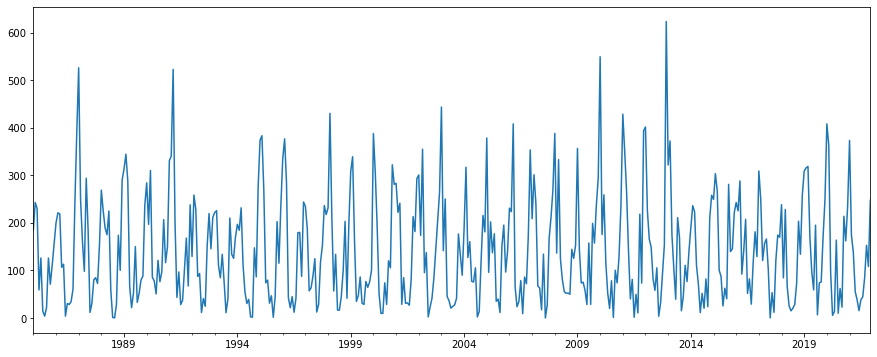

In [538]:
serie.plot()
plt.show()

A princípio, é possível perceber que não há uma tendência, isto é, um crescimento ou um decrescimento, mas é possível perceber que existe uma clara sazonalidade.

***
## Análise e Preparação da Série

### Média Móvel

Vamos verificar a tendência, apartir da média móvel.

In [539]:
media_movel = serie.rolling(window=6) # Período de 6 meses na média móvel
media_movel = media_movel.mean()

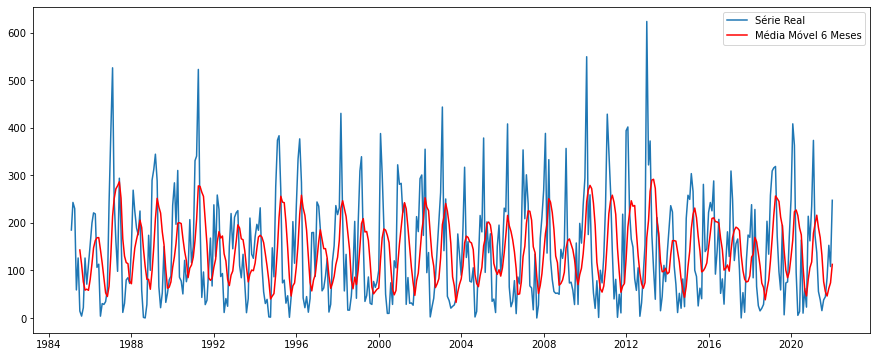

In [540]:
plt.plot(serie, label = "Série Real")
plt.plot(media_movel, color='red', label='Média Móvel 6 Meses')
plt.legend(loc='best')
plt.show()

Existe uma oscilação na média móvel, porém, ela é bem mais suavizada. É possível perceber que não existe uma tendência, crescente ou decrescente, clara graficamente.

### Decomposição

In [541]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [542]:
decomposicao = seasonal_decompose(serie)

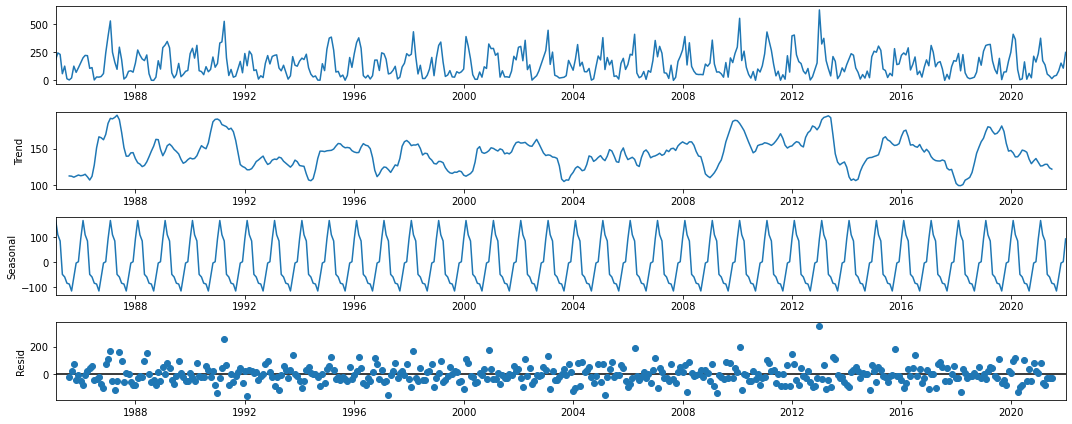

In [543]:
decomposicao.plot()
plt.show()

O primeiro gráfico é a série real. Na segunda diz respeito a tendência, mostrando que não há um ciclo ou algo bem definido. Na terceira temos a sazonalidade da série, que nos mostra a presença forte e bem constante, com intervalos bem definidos nos níveis pluviométricos. Isso relata o fato de que, na cidade de São Paulo, no começo e no final do ano, temos forte presença de chuva, enquanto que no meio do ano temos uma fraca presença de chuva. E, por último, temos os resíduos, quando se tira a tendência e a sazonalidade, ele será utilizado para criar modelos e testes.

### Normalidade e Transformação

In [544]:
import scipy.stats as stats

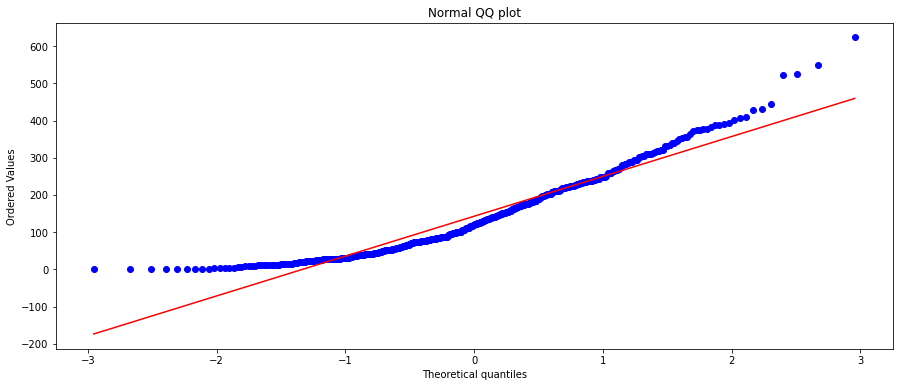

In [545]:
stats.probplot(serie, dist='norm', plot=plt)
plt.title("Normal QQ plot")
plt.show()

Graficamente, essa normalidade, pelo QQ-Plot, está bem distante da normalidade, vamos testar numericamente:

### Teste Shapiro-Wilk

<p style="text-align: center;">Ho = Distribuição Normal (P > 0.05)</p>
<p style="text-align: center;">Ho = Distribuição Não Normal (P <= 0.05)</p>

In [546]:
e, p = stats.shapiro(serie)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9234699606895447
p-valor: 2.939664435269371e-14


Com o P-Valor menor que 0.05, confirmamos, estatísticamente, que a série não segue uma normal. O próximo passo será transformar essa série em uma normal através da transformação

### Transformação - Log normal

In [547]:
serie2 = np.log(serie)

e, p = stats.shapiro(serie2)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.8675904273986816
p-valor: 5.647604583527236e-19


Não tivemos sucesso com a Log Normal, uma vez que o P-Valor deu menor doque a série original. Vamos testar outra transformação:

### Transformação - Raíz Cúbica

In [548]:
serie3 = (serie)**(1/3)

e, p = stats.shapiro(serie3)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9873077273368835
p-valor: 0.0006522401235997677


Tivemos uma clara melhora referente a normalidade da série, porém não obtivemos uma normalidade estatística.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


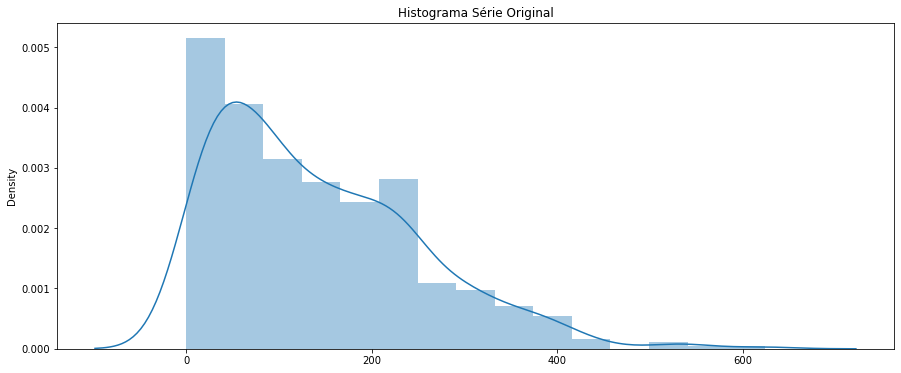

In [549]:
sns.distplot(serie).set_title('Histograma Série Original');

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Série Transformada')

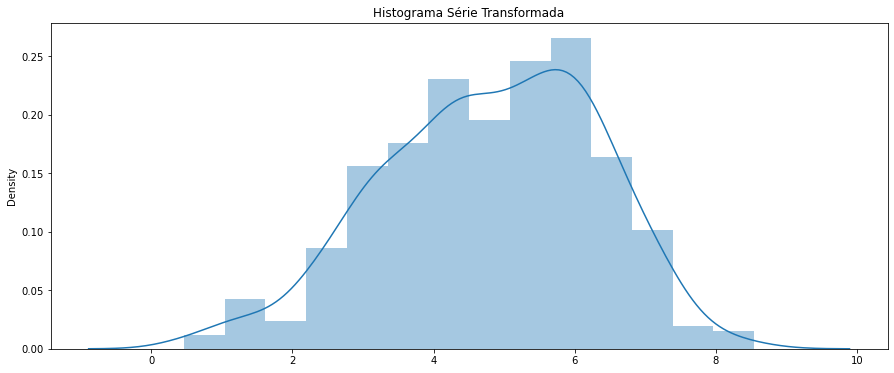

In [550]:
sns.distplot(serie3).set_title('Histograma Série Transformada')

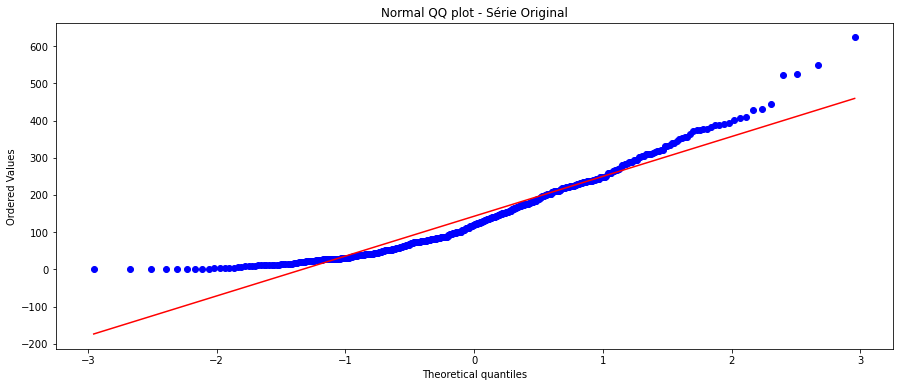

In [551]:
stats.probplot(serie, dist='norm', plot=plt)
plt.title("Normal QQ plot - Série Original")
plt.show()

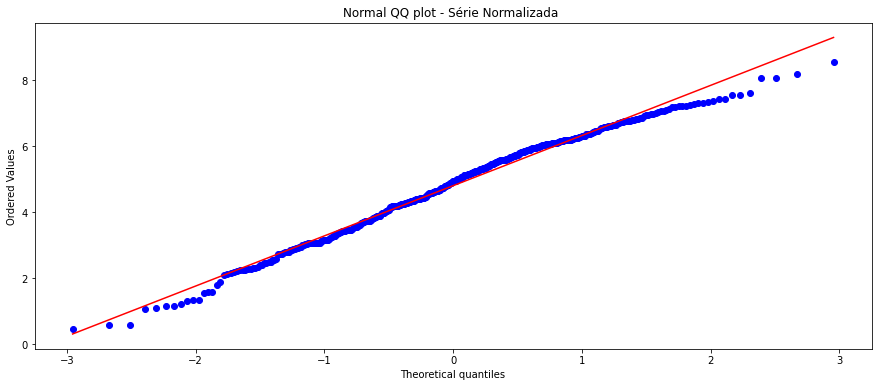

In [552]:
stats.probplot(serie3, dist='norm', plot=plt)
plt.title("Normal QQ plot - Série Normalizada ")
plt.show()

### Estacionaridade

In [553]:
import statsmodels.tsa.stattools

Para testar a estacionaridade, se a média e variância é constante ao longo da série, usaremos o teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

<p style="text-align: center;">Ho = Não é estacionário (estatística do teste > valor crítico)</p>
<p style="text-align: center;">Ha = É estacionário (estatística do teste < valor crítico)</p>

In [554]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print(f'Estatística do Teste: {kpss[0]}')
print(f'P_Valor: {kpss[1]}')
print(f'Valores Críticos:')
for chave, valor in kpss[3].items():
    print(f'{chave} : {valor}')

Estatística do Teste: 0.020297693857416817
P_Valor: 0.1
Valores Críticos:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739


C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


A estatística do teste é menor que o valor crítico, isto é, recusamos a hipótese nula e aceitamos a hipótese alternativa, que nos diz que a série é estacionária (média e variância constante ao longo da série).

Caso ela não tivesse passado no teste, poderiamos criar outra série, fazendo a diferenciação dela:

In [555]:
# serie5 = np.diff(serie3)

### Autocorrelação

A autocorrelação é a correlação de determinados períodos anteriores com o período atual. Todo período com esse tipo de correlação é determinado lag, isto é, o número de períodos que separamos a nossa amostra, por exemplo, se optarmos por 10 lags, dividirmos nossa amostra em 10 períodos. O **ACF** é analisado períodos exatamente anteriores, enquanto que o **PACF** é analisado períodos bem anteriores, mais distantes.

In [556]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

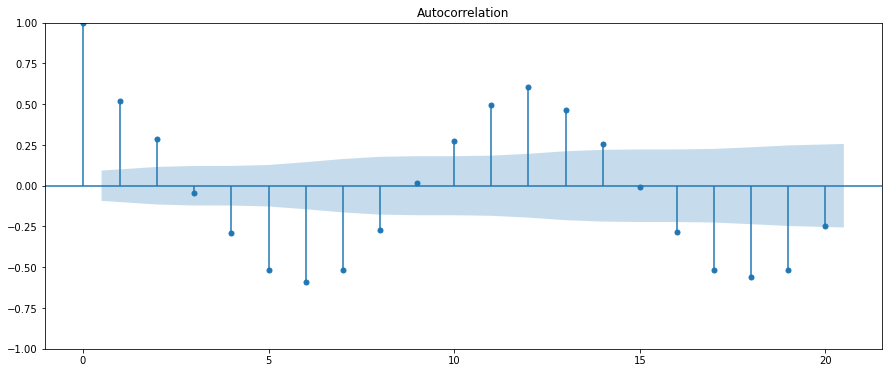

In [557]:
plot_acf(serie3, lags=20)
plt.show()

O diagrama de autocorrelação nos mostra que existe uma forte sazonalidade, isto é, a correlação de períodos anteriores com o período atual analisado.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


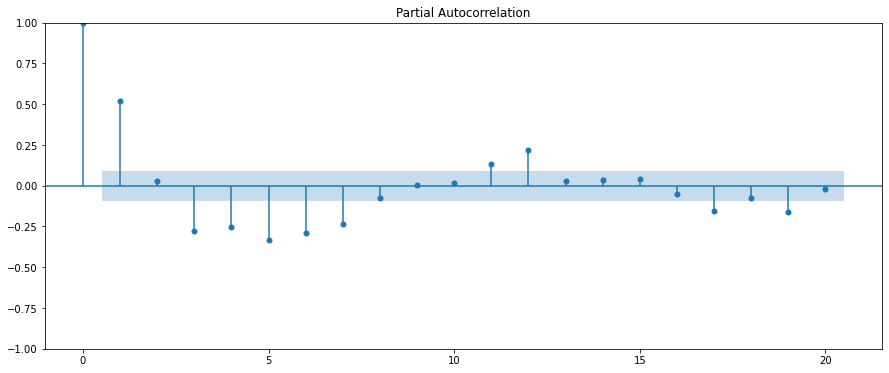

In [558]:
plot_pacf(serie3, lags=20)
plt.show()

A série é autocorrelacionada, tanto no momento anterior, quanto em momentos bem distintos. **A autocorrelação é importante na hora da análise dos resíduos dos modelos**.

***
# Modelo Auto Regressivo - AR

Modelo AR: (p,0,0) <br>

Sendo p: Ordem da autoregressão

In [559]:
import statsmodels.api as sm

In [591]:
modelo_ar = sm.tsa.arima.ARIMA(serie3, order = (10,0,0))

In [592]:
resultado = modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                ARIMA(10, 0, 0)   Log Likelihood                -656.343
Date:                Mon, 12 Jun 2023   AIC                           1336.687
Time:                        14:59:41   BIC                           1385.837
Sample:                    01-31-1985   HQIC                          1356.069
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8007      0.033    145.047      0.000       4.736       4.866
ar.L1          0.1764      0.045      3.912      0.000       0.088       0.265
ar.L2          0.0621      0.050      1.232      0.2

O AIC (Akaike Information Criterion) é uma métrica que mensura a qualidade de um modelo estatístico visando também a sua simplicidade. Fornece, portanto, uma métrica para comparação e seleção de modelos, em que menores valores de AIC representam uma maior qualidade e simplicidade, segundo este critério.

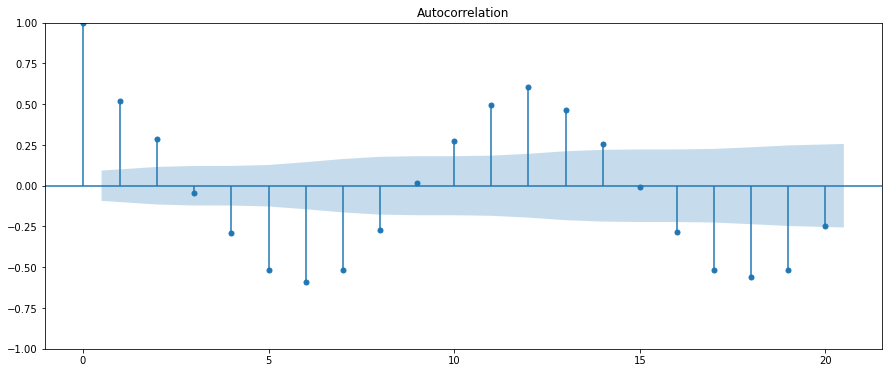

In [562]:
plot_acf(serie3, lags=20) # Em 20 períodos
plt.show()

No terceiro período, temos uma mudança de correlação, juntamente com o nono período. <br>

Tivemos o primeiro modelo AR, **com um AIC de 1336,687**, uma ordem de regressão 10.

## Análise dos Resíduos

In [587]:
residuos = resultado.resid

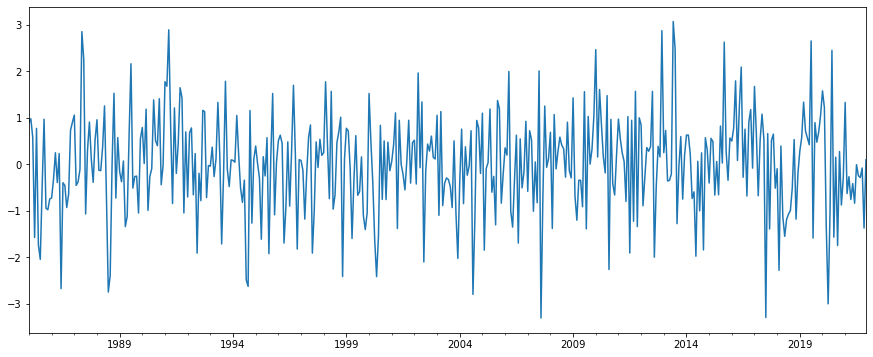

In [593]:
residuos.plot()
plt.show()

A série dos resíduos apresenta o padrão ruído branco. Uma série temporal que não apresenta autocorrelação (puramente aleatório), **media zero** e variância finita e constante.

### Normalidade

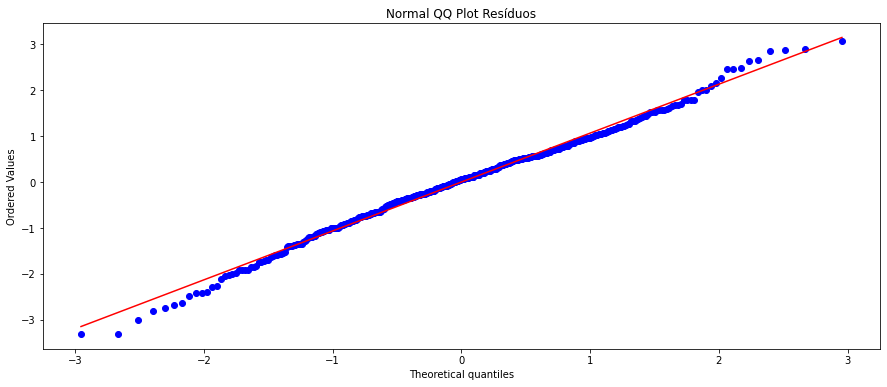

In [595]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title("Normal QQ Plot Resíduos")
plt.show()

In [596]:
e, p = stats.shapiro(residuos)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9932354092597961
P-Valor: 0.04359482228755951


Um valor muito próximo a 0,05, mas, em uma noção estatística, rejeitamos a hipótese nula e afirmamos que não é uma normal.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


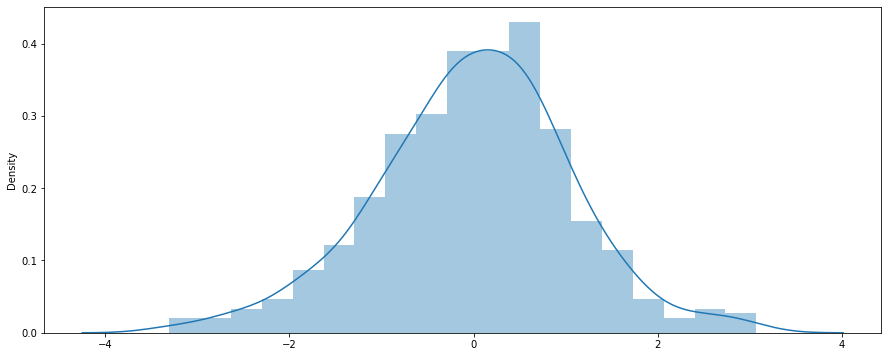

In [597]:
import seaborn as sns
sns.distplot(residuos);

Nosso modelo, pela análise dos resíduos, não se mostra como um bom candidato a fazer previsões. Porém, é melhor ter um modelo doque não ter nenhum.

## Autocorrelação

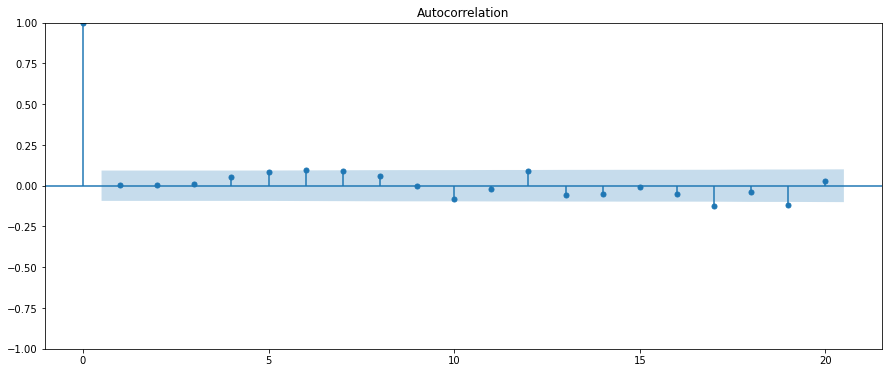

In [600]:
plot_acf(residuos, lags=20)
plt.show()

Não existe autocorrelação entre os valores dos resíduos, passando neste teste.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


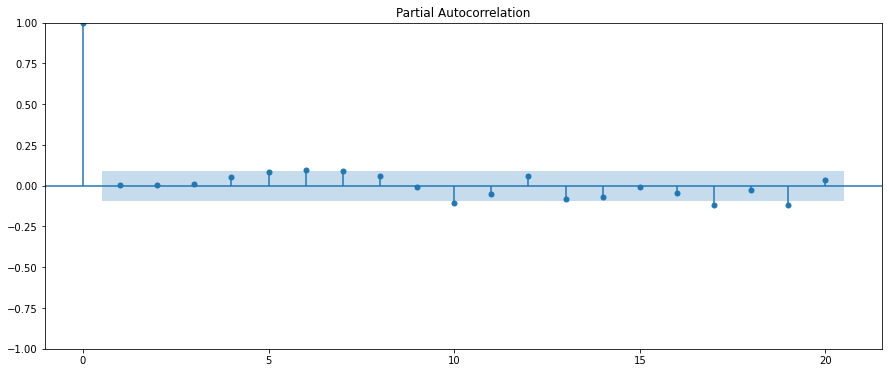

In [601]:
plot_pacf(residuos, lags=20)
plt.show()

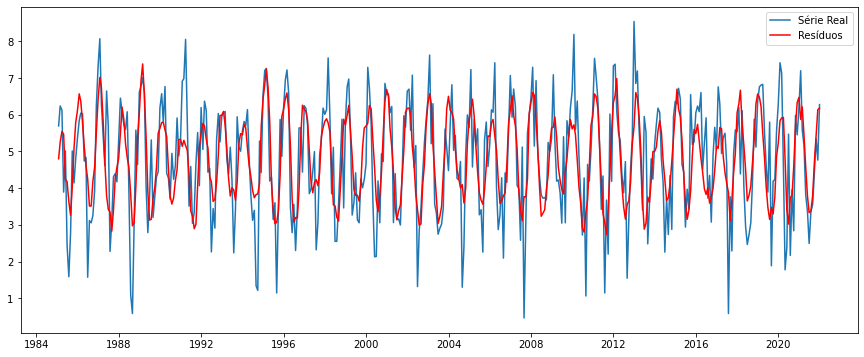

In [605]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos, color='red', label='Resíduos') # o hífen serve para alinhar com a série, ficar bem próximo.
plt.legend(loc='best')
plt.show()

## Previsão - Modelo AR

In [606]:
resultado.fittedvalues

1985-01-31    4.800653
1985-02-28    5.262195
1985-03-31    5.546130
1985-04-30    5.468519
1985-05-31    4.244518
                ...   
2021-08-31    3.811121
2021-09-30    4.669722
2021-10-31    5.419968
2021-11-30    6.154477
2021-12-31    6.177223
Freq: M, Length: 444, dtype: float64

In [617]:
previsao = resultado.predict(start=431, ends=444)
previsao

2020-12-31    6.496907
2021-01-31    5.871220
2021-02-28    6.153798
2021-03-31    5.397404
2021-04-30    4.618644
2021-05-31    3.770454
2021-06-30    3.338061
2021-07-31    3.333194
2021-08-31    3.811121
2021-09-30    4.669722
2021-10-31    5.419968
2021-11-30    6.154477
2021-12-31    6.177223
Freq: M, Name: predicted_mean, dtype: float64

In [635]:
previsao2 = resultado.forecast(12) # Quanto mais distante do ponto de referência, pior será a previsão
previsao2

2022-01-31    6.209607
2022-02-28    5.918720
2022-03-31    5.236743
2022-04-30    4.672577
2022-05-31    4.136124
2022-06-30    3.863552
2022-07-31    3.718088
2022-08-31    3.899965
2022-09-30    4.326785
2022-10-31    4.885948
2022-11-30    5.346839
2022-12-31    5.636660
Freq: M, Name: predicted_mean, dtype: float64

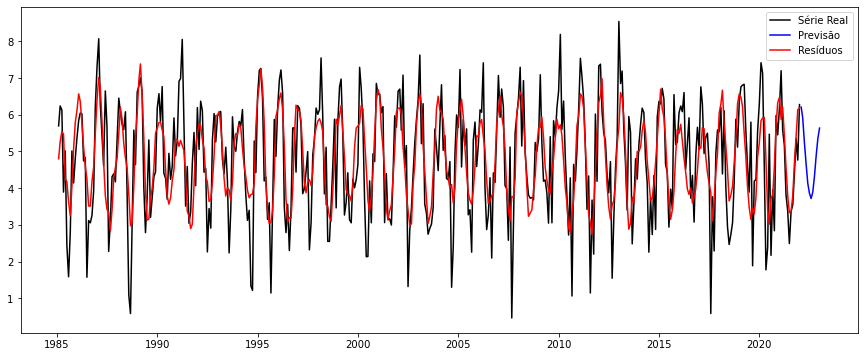

In [636]:
plt.plot(serie3, color='black', label='Série Real')
plt.plot(previsao2, color='blue', label='Previsão')
plt.plot(serie3-residuos, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Os valores, nessa série, não estáo em formato padrão, estão transformados para uma normal cúbica. Temos que voltar para a escala original:

In [647]:
prev_escala = pd.DataFrame(previsao2 ** 3)
prev_escala

,predicted_mean
2022-01-31,239.437614
2022-02-28,207.340163
2022-03-31,143.609697
2022-04-30,102.016291
2022-05-31,70.758821
2022-06-30,57.671394
2022-07-31,51.399510
2022-08-31,59.317409
2022-09-30,81.002013
2022-10-31,116.639709


<AxesSubplot:>

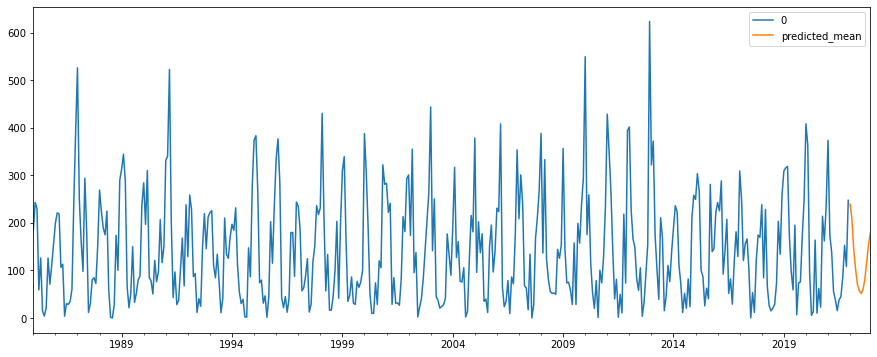

In [650]:
pd.concat([serie,prev_escala]).plot()

***
# Modelo Média Móvel - MA

O modelo de média móvel está relacionado ao erro de regressão, isto é, associa uma combinação linear dos erros anteriores, dos erros passados. <br>

Modelo Moving Average: (0,0,q) <br>

Sendo q: Ordem da média móvel.

In [656]:
modelo_ma = sm.tsa.arima.ARIMA(serie3, order = (0,0,10))
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                ARIMA(0, 0, 10)   Log Likelihood                -696.525
Date:                Mon, 12 Jun 2023   AIC                           1417.049
Time:                        15:53:08   BIC                           1466.199
Sample:                    01-31-1985   HQIC                          1436.432
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8095      0.025    194.624      0.000       4.761       4.858
ma.L1          0.3410      0.051      6.739      0.000       0.242       0.440
ma.L2          0.2803      0.049      5.729      0.0

Temos, com o modelo **MA(0,0,10), AIC = 1417,049**<br>
Temos, com o modelo **AR(10,0,0), AIC = 1336,687**

## Análise dos Resíduos

In [657]:
residuos_ma = resultado_ma.resid

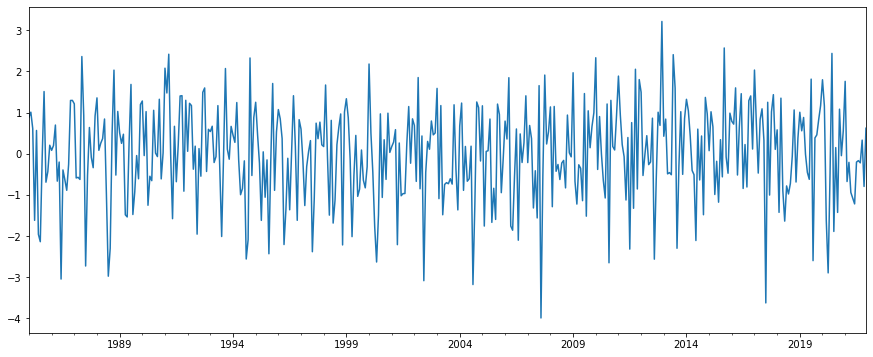

In [658]:
residuos_ma.plot()
plt.show()

A média está praticamente constante, é possível dividir a série ao meio, com  tendência zero.

## Normalidade

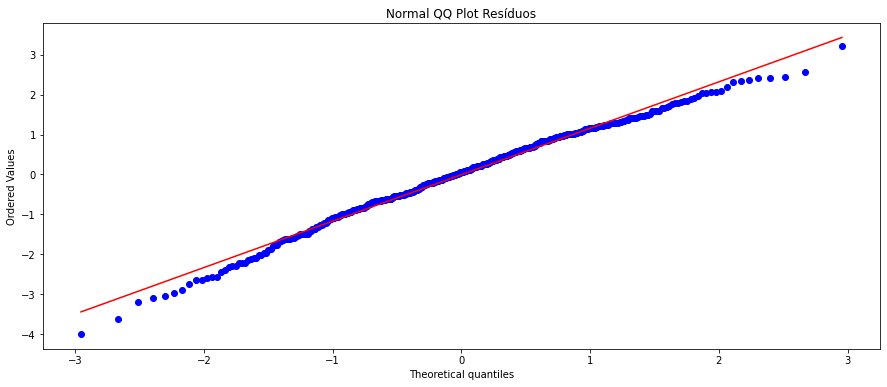

In [659]:
stats.probplot(residuos_ma, dist='norm', plot=plt)
plt.title("Normal QQ Plot Resíduos")
plt.show()

In [661]:
e, p = stats.shapiro(residuos_ma)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9902313947677612
P-Valor: 0.004812701605260372


Temos um valor bem menor que 0.05, isto é, rejeitamos a hipótese nula e afirmarmos que a distribuição não é uma normal.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


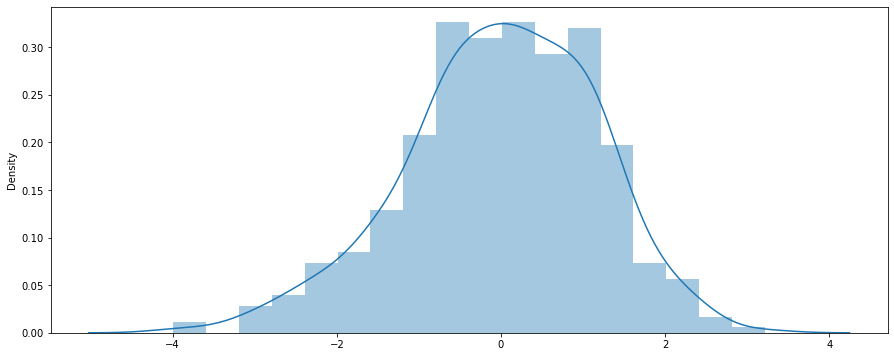

In [662]:
sns.distplot(residuos_ma);

## Autocorrelação

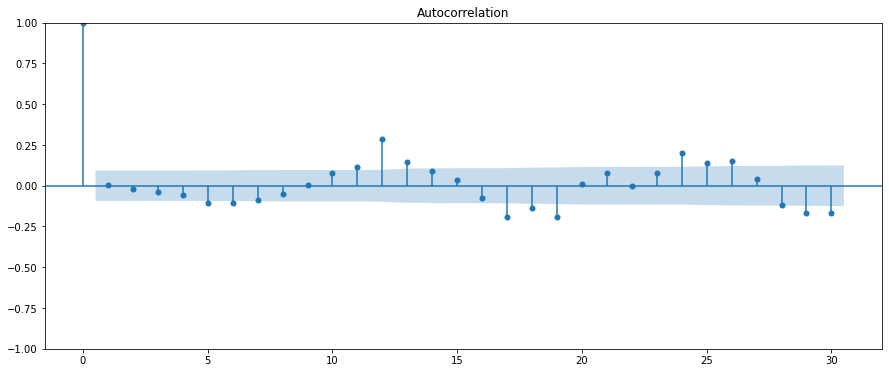

In [663]:
plot_acf(residuos_ma, lags=30)
plt.show()

Existem diversos parâmetros fora do intervalo de confiança, começa a aparecer bastante valores fora do IC, isto é, a existência de uma autocorrelação, oque pode ser um grande problema para o nosso modelo.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


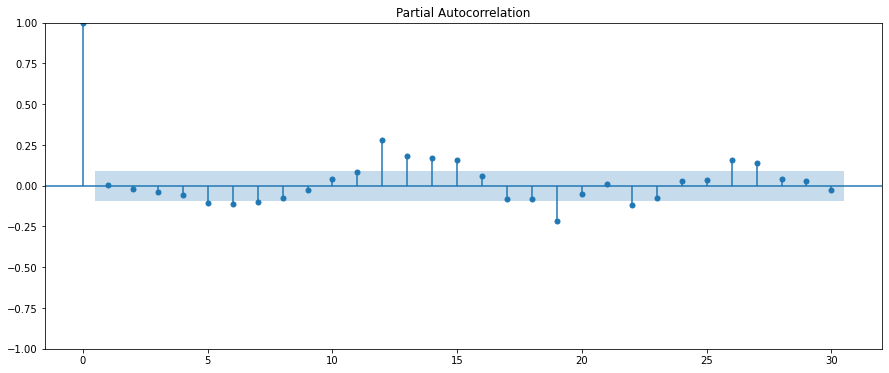

In [665]:
plot_pacf(residuos_ma, lags=30)
plt.show()

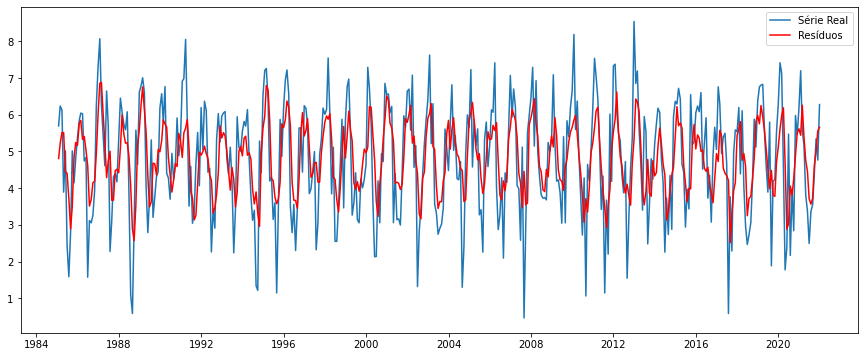

In [666]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_ma, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

## Previsão

In [667]:
resultado_ma.fittedvalues # Todos os valores que a série temporal ajustou, transformados

1985-01-31    4.809542
1985-02-28    5.230170
1985-03-31    5.513221
1985-04-30    5.513244
1985-05-31    4.451054
                ...   
2021-08-31    3.720390
2021-09-30    4.620414
2021-10-31    5.016005
2021-11-30    5.561428
2021-12-31    5.658795
Freq: M, Length: 444, dtype: float64

In [669]:
previsao_ma = resultado_ma.forecast(12)
previsao_ma

2022-01-31    5.715417
2022-02-28    5.636282
2022-03-31    5.278993
2022-04-30    5.140603
2022-05-31    4.900100
2022-06-30    4.900250
2022-07-31    4.762703
2022-08-31    4.741463
2022-09-30    4.823280
2022-10-31    4.729702
2022-11-30    4.809542
2022-12-31    4.809542
Freq: M, Name: predicted_mean, dtype: float64

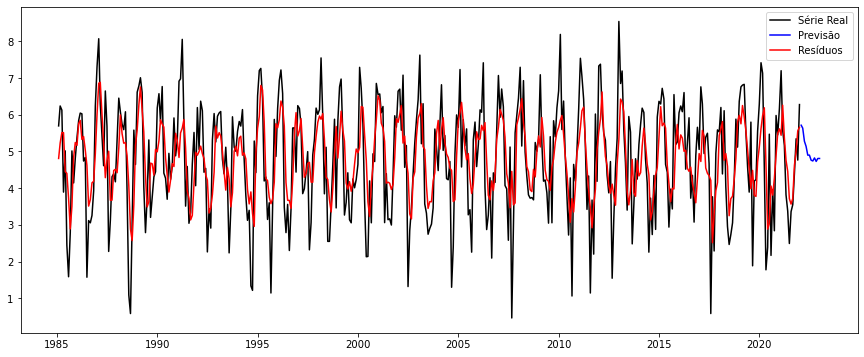

In [672]:
plt.plot(serie3, color='black', label='Série Real')
plt.plot(previsao_ma, color='blue', label='Previsão')
plt.plot(serie3-residuos_ma, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Esse modelo não é o modelo adequado, uma vez que apresentou auto correlação nos resíduos.

In [678]:
prev_escala_ma = pd.DataFrame(previsao_ma ** 3)
prev_escala_ma

,predicted_mean
2022-01-31,186.699778
2022-02-28,179.051557
2022-03-31,147.113738
2022-04-30,135.844538
2022-05-31,117.656200
2022-06-30,117.667018
2022-07-31,108.033985
2022-08-31,106.595074
2022-09-30,112.208952
2022-10-31,105.803822


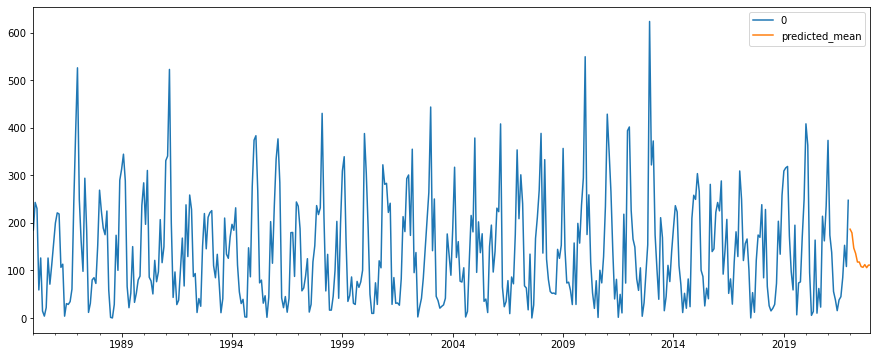

In [679]:
pd.concat([serie, prev_escala_ma]).plot();

Pelo fato de existir uma amplitude pequena e, após um ano, fica uma chuva constante, oque não é real para a cidade de SP.

***
# Modelo Auto Regressivo e Media Móvel - ARMA

Modelo ARMA: (P,0,Q) <br>

Sendo: <br>
P: Ordem de auto regressão <br>
0: Grau de diferenciação <br>
Q: Ordem de média móvel 

Temos, com o modelo MA(0,0,10), AIC = 1417,049 <br>
Temos, com o modelo AR(10,0,0), AIC = 1336,687

In [685]:
modelo_arma = sm.tsa.arima.ARIMA(serie3, order = (10,0,4))
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                ARIMA(10, 0, 4)   Log Likelihood                -621.050
Date:                Tue, 13 Jun 2023   AIC                           1274.099
Time:                        12:44:11   BIC                           1339.633
Sample:                    01-31-1985   HQIC                          1299.943
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8061      0.042    113.906      0.000       4.723       4.889
ar.L1          0.8040      0.063     12.791      0.000       0.681       0.927
ar.L2         -0.3335      0.085     -3.913      0.0

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Temos, com o modelo ARMA(10,0,2): **AIC = 1274,099**

### Análise dos Resíduos

In [686]:
residuos_arma = resultado_arma.resid

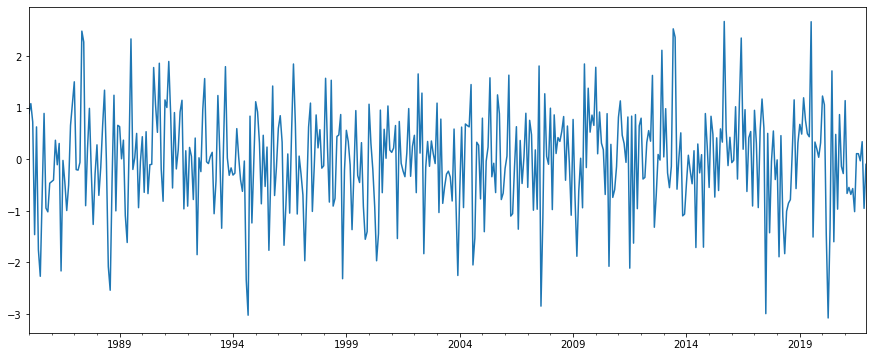

In [688]:
residuos_arma.plot()
plt.show()

Podemos ver uma média zero e sem uma tendência clara, é possível que tenhamos bons resíduos.

### Normalidade

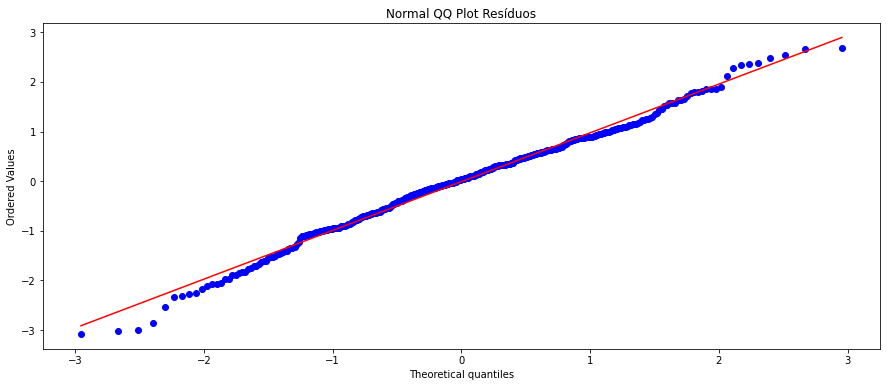

In [689]:
stats.probplot(residuos_arma, dist='norm', plot=plt)
plt.title("Normal QQ Plot Resíduos")
plt.show()

In [690]:
e, p = stats.shapiro(residuos_arma)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9920413494110107
P-Valor: 0.017904900014400482


Temos um P-Valor menor que 0.05, ou seja, estatísticamente não é uma normal.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

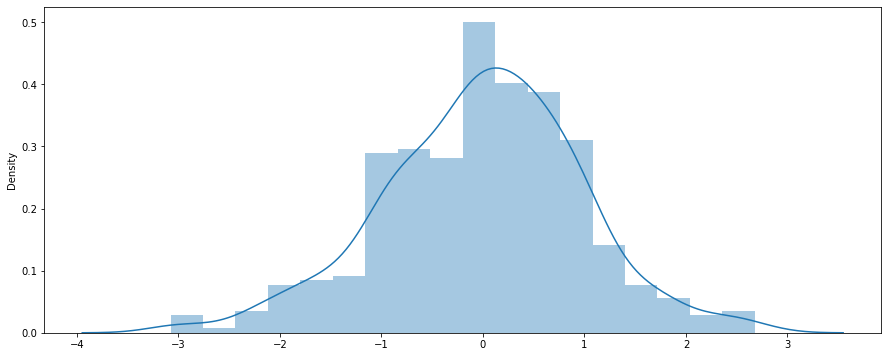

In [691]:
sns.distplot(residuos_arma)

### Autocorrelação

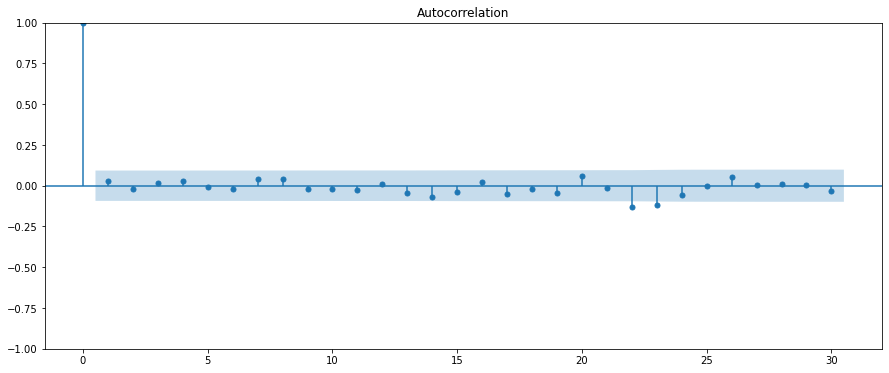

In [692]:
plot_acf(residuos_arma, lags=30)
plt.show()

Maioria dos intervalos estão no IC, oque significa que temos uma autocorrelação fraca.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


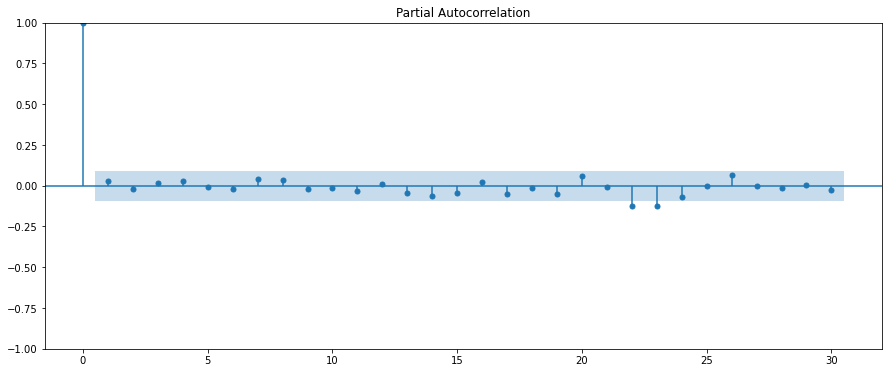

In [696]:
plot_pacf(residuos_arma, lags=30)
plt.show()

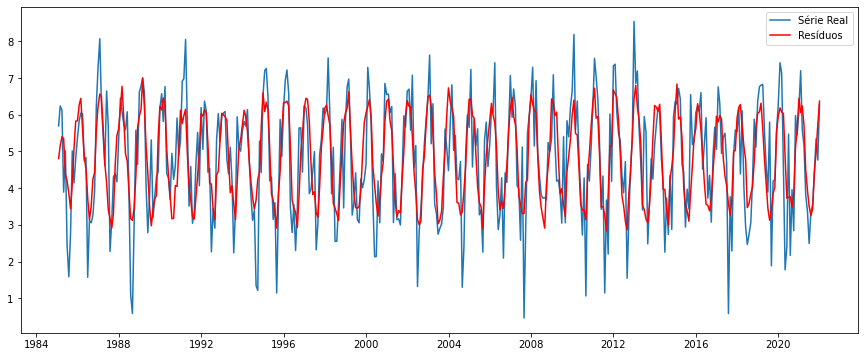

In [697]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_arma, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

### Previsão

In [698]:
resultado_arma.fittedvalues

1985-01-31    4.806100
1985-02-28    5.156255
1985-03-31    5.400121
1985-04-30    5.352863
1985-05-31    4.384254
                ...   
2021-08-31    3.440769
2021-09-30    4.425185
2021-10-31    5.001712
2021-11-30    5.714891
2021-12-31    6.372617
Freq: M, Length: 444, dtype: float64

In [699]:
previsao_arma = resultado_arma.forecast(12)
previsao_arma

2022-01-31    6.359669
2022-02-28    6.124429
2022-03-31    5.518051
2022-04-30    4.651567
2022-05-31    3.750301
2022-06-30    3.486053
2022-07-31    3.267162
2022-08-31    3.410264
2022-09-30    4.261173
2022-10-31    5.000747
2022-11-30    5.618211
2022-12-31    6.317797
Freq: M, Name: predicted_mean, dtype: float64

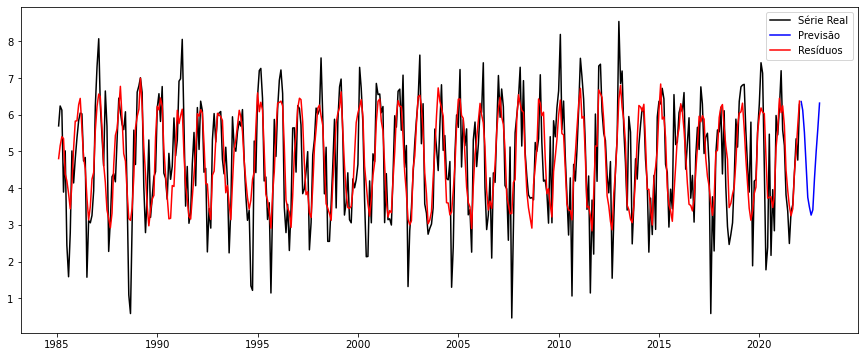

In [701]:
plt.plot(serie3, color='black', label='Série Real')
plt.plot(previsao_arma, color='blue', label='Previsão')
plt.plot(serie3-residuos_arma, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

Uma bela amplitude, diferente do modelo de média móvel.

In [702]:
prev_escala_arma = pd.DataFrame(previsao_arma ** 3)
prev_escala_arma

,predicted_mean
2022-01-31,257.219270
2022-02-28,229.718893
2022-03-31,168.018475
2022-04-30,100.646331
2022-05-31,52.747092
2022-06-30,42.364500
2022-07-31,34.874831
2022-08-31,39.661047
2022-09-30,77.372658
2022-10-31,125.056006


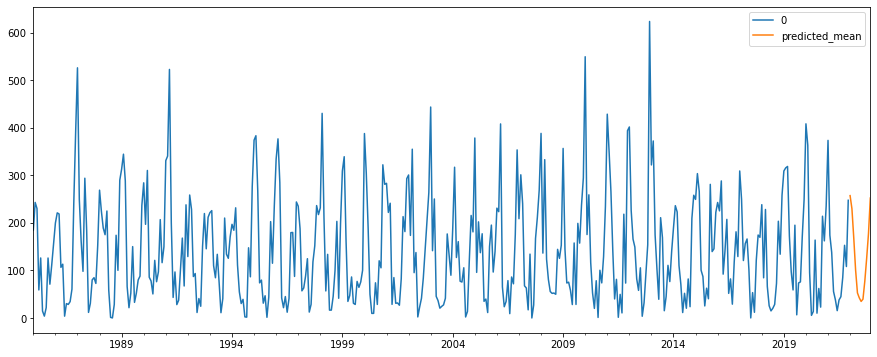

In [703]:
pd.concat([serie, prev_escala_arma]).plot();

***
# Modelo Auto regressivo Integrado e Média Móvel - ARIMA

Modelo ARIMA: (p,d,q)

Sendo: <br>
p: Ordem auto regressiva <br>
d: Grau de diferenciação <br>
q: Ordem da média móvel <br>

Temos, com o modelo **MA(0,0,10): AIC = 1417,049**<br>
Temos, com o modelo **AR(10,0,0): AIC = 1336,687** <br>
Temos, com o modelo **ARMA(10,0,4): AIC = 1274.099** <br>

Na prática, não foi necessário realizar uma diferenciação, pois a série já era estacionária, mas vamos utilizar por didática.

In [704]:
modelo_arima = sm.tsa.arima.ARIMA(serie3, order = (10,1,2))
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  444
Model:                ARIMA(10, 1, 2)   Log Likelihood                -651.044
Date:                Tue, 13 Jun 2023   AIC                           1328.089
Time:                        15:59:40   BIC                           1381.305
Sample:                    01-31-1985   HQIC                          1349.077
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7351      0.067     11.054      0.000       0.605       0.865
ar.L2         -0.2578      0.063     -4.069      0.000      -0.382      -0.134
ar.L3         -0.2844      0.069     -4.110      0.0

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Temos, com o modelo **ARIMA(10,1,2): AIC = 1328.089** <br>

## Análise dos Resíduos

In [705]:
residuos_arima = resultado_arima.resid

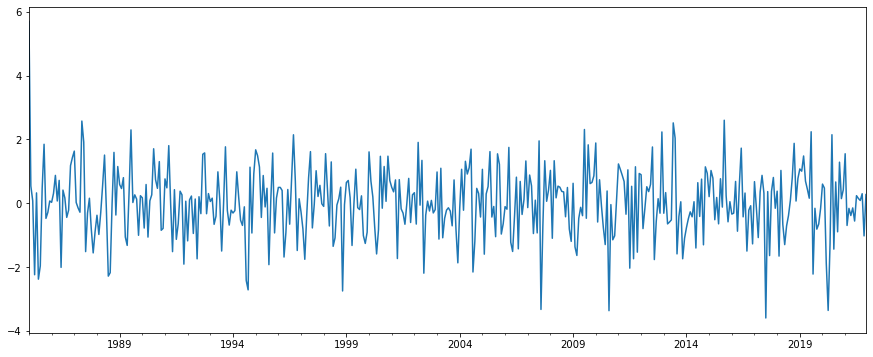

In [706]:
residuos_arima.plot()
plt.show()

### Normalidade

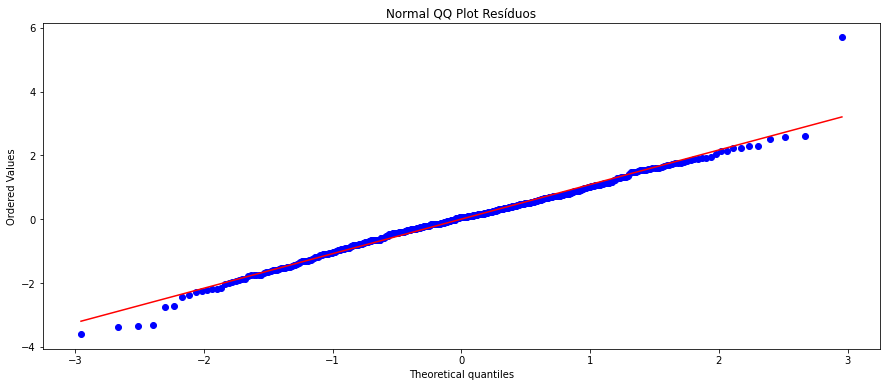

In [707]:
stats.probplot(residuos_arima, dist='norm', plot=plt)
plt.title("Normal QQ Plot Resíduos")
plt.show()

In [708]:
e, p = stats.shapiro(residuos_arima)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9843103289604187
P-Valor: 9.886625775834545e-05


P-Valor bem menor que 0.05, ou seja, rejeitamos a hipótese nula de que a normalidade dos resíduos siga uma normal.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

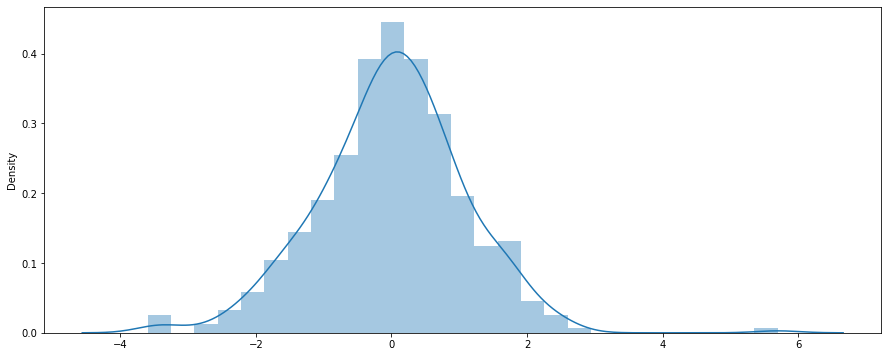

In [709]:
sns.distplot(residuos_arima)

Apesar do resultado do teste Shapiro-Wilk ter rejeitado a normalidade, temos, graficamente, uma normalidade muito parecida.

### Autocorrelação

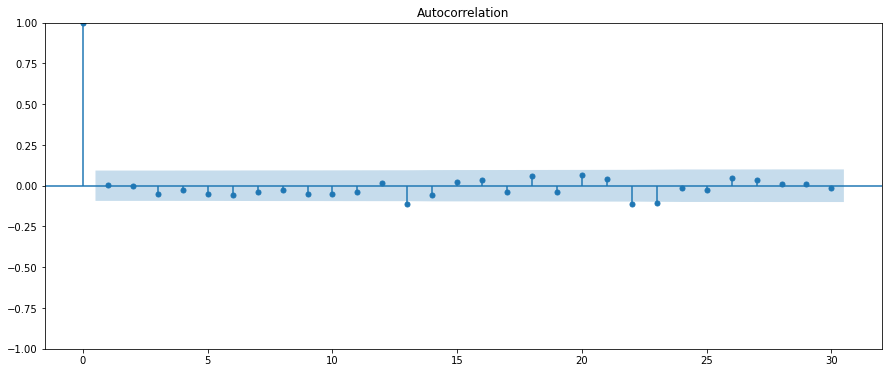

In [710]:
plot_acf(residuos_arima, lags=30)
plt.show()

Uma autocorrelação bastante fraca

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


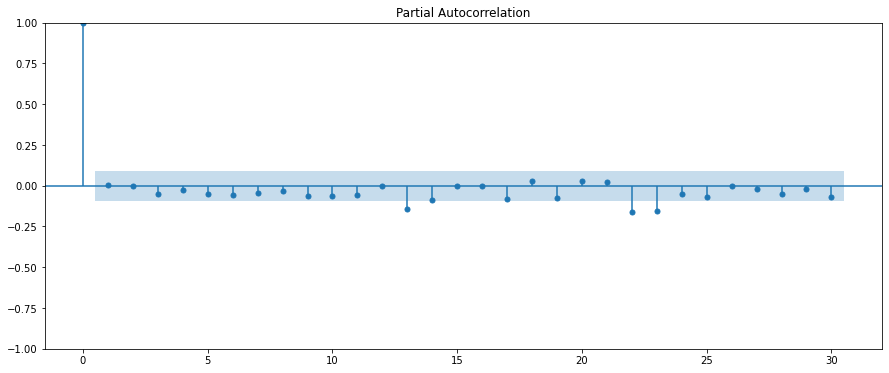

In [711]:
plot_pacf(residuos_arima, lags=30)
plt.show()

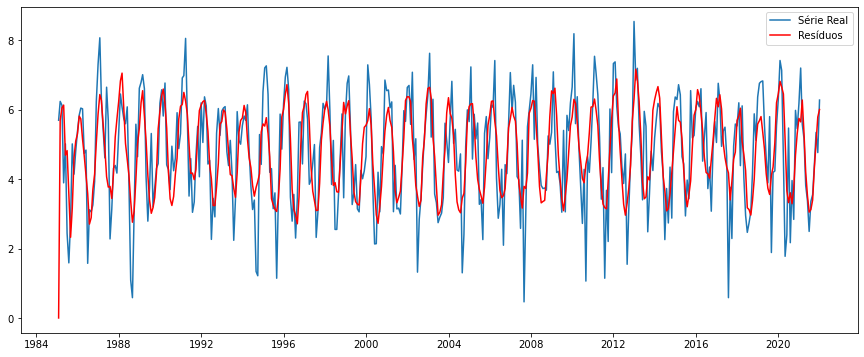

In [712]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_arima, color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

## Previsão

In [713]:
resultado_arima.fittedvalues

1985-01-31    0.000000
1985-02-28    5.696988
1985-03-31    6.050975
1985-04-30    6.132521
1985-05-31    4.690807
                ...   
2021-08-31    3.401059
2021-09-30    4.310608
2021-10-31    5.046370
2021-11-30    5.787882
2021-12-31    6.005179
Freq: M, Length: 444, dtype: float64

In [716]:
previsao_arima = resultado_arima.forecast(12)
previsao_arima

2022-01-31    6.090034
2022-02-28    5.763059
2022-03-31    4.923154
2022-04-30    4.190534
2022-05-31    3.412648
2022-06-30    3.073284
2022-07-31    2.989833
2022-08-31    3.421259
2022-09-30    4.229934
2022-10-31    5.011004
2022-11-30    5.661055
2022-12-31    6.010018
Freq: M, Name: predicted_mean, dtype: float64

In [721]:
prev_escala_arima = pd.DataFrame(previsao_arima ** 3)
prev_escala_arima

,predicted_mean
2022-01-31,225.870307
2022-02-28,191.407579
2022-03-31,119.324693
2022-04-30,73.588163
2022-05-31,39.744269
2022-06-30,29.027403
2022-07-31,26.726429
2022-08-31,40.045891
2022-09-30,75.683433
2022-10-31,125.827137


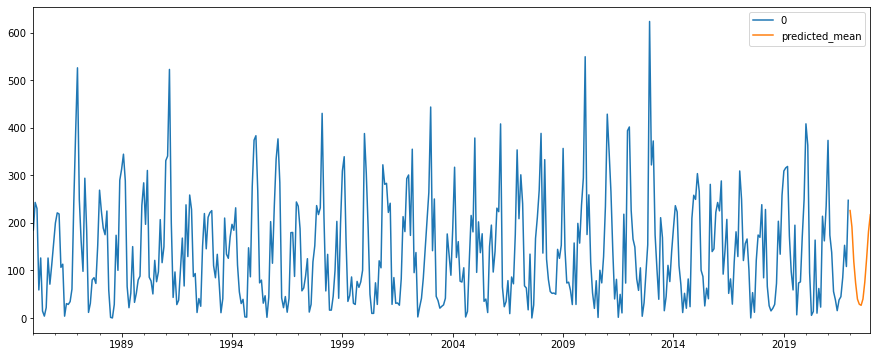

In [719]:
pd.concat([serie, prev_escala_arima]).plot();

***
# Modelo Auto ARIMA

Modelo ARIMA: (p,d,q) <br>
Modelo SARIMA:: (p,d,q)(P,D,Q); O modelo SARIMA, por ter o parâmetro de sazonalidade, será muito importante para nossa série.

Temos, com o modelo **MA(0,0,10): AIC = 1417,049**<br>
Temos, com o modelo **AR(10,0,0): AIC = 1336,687** <br>
Temos, com o modelo **ARMA(10,0,4): AIC = 1274.099** <br>
Temos, com o modelo **ARIMA(10,1,2): AIC = 1328.089** <br>

In [722]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [723]:
from pmdarima.arima import auto_arima

In [727]:
modelo_auto = auto_arima(serie3, trace = True, stepwise = False, seasonal = True, max_p=10, max_q=10,
                        max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12, stationary = True)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1636.827, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1510.806, Time=0.10 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1483.985, Time=0.46 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1436.975, Time=0.84 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=1412.639, Time=1.32 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1429.566, Time=0.25 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.99 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1271.450, Time=4.15 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=1267.250, Time=7.35 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1384.453, Time=1.71 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1432.354, Time=1.87 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=5.16 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=2.85 sec
 ARIMA(0,0,0)(3,0,1)

C:\Users\Appleack\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,0)(2,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\Appleack\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\Appleack\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\Appleack\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\Appleack\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=me

 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=4.40 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1497.134, Time=0.20 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1441.966, Time=0.53 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=1431.382, Time=1.70 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1408.284, Time=0.83 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=1374.833, Time=2.96 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1415.713, Time=1.11 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=1488.307, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1468.526, Time=0.10 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=1426.990, Time=0.32 sec
 ARIMA(3,0,0)(0,0,2)[12] intercept   : AIC=1419.418, Time=1.37 sec
 ARIMA(3,0,0)(1,0,0)[

Significado dos parâmetros: <br>

Trace: apresenta no console a lista dos modelos, um passo a passo. <br>
stepwise: Seleção gradual (processo mais rápido, porém menos minucioso). <br>
m: período sazonal, neste caso é mensal (12 dados) <br>
Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 4, max.Q = 4 (parâmetros do modelo SARIMA) <br>

In [728]:
print(modelo_auto.aic())

1262.5121709689943


Temos, com o modelo **AUTO ARIMA(0,0,1)(3,0,1): AIC = 1262.512** <br>

In [730]:
resultado_auto = modelo_auto.fit(serie3)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  444
Model:             SARIMAX(0, 0, 1)x(3, 0, 1, 12)   Log Likelihood                -624.256
Date:                            Wed, 14 Jun 2023   AIC                           1262.512
Time:                                    12:42:17   BIC                           1291.183
Sample:                                01-31-1985   HQIC                          1273.819
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0244      0.016      1.555      0.120      -0.006       0.055
ma.L1          0.0879      0.043   

## Análise dos Resíduos

In [731]:
residuos_auto = resultado_auto.resid
residuos_auto()

1985-01-31    0.900232
1985-02-28    1.364081
1985-03-31    1.210223
1985-04-30   -1.010184
1985-05-31    0.308019
                ...   
2021-08-31    0.411056
2021-09-30    0.468244
2021-10-31    0.214925
2021-11-30   -0.511921
2021-12-31    0.279779
Freq: M, Length: 444, dtype: float64

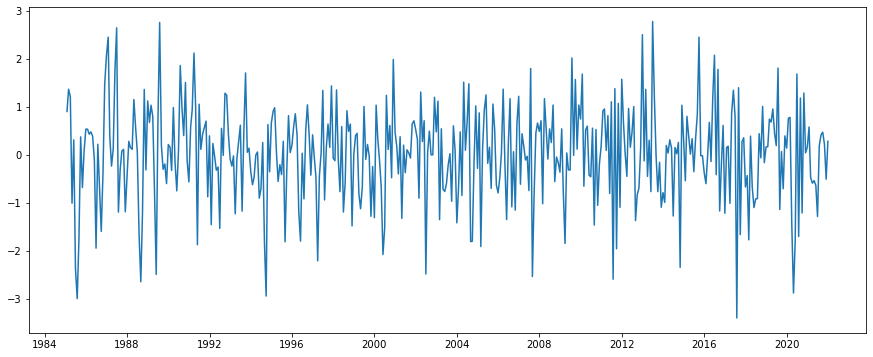

In [732]:
plt.plot(residuos_auto())
plt.show()

## Normalidade

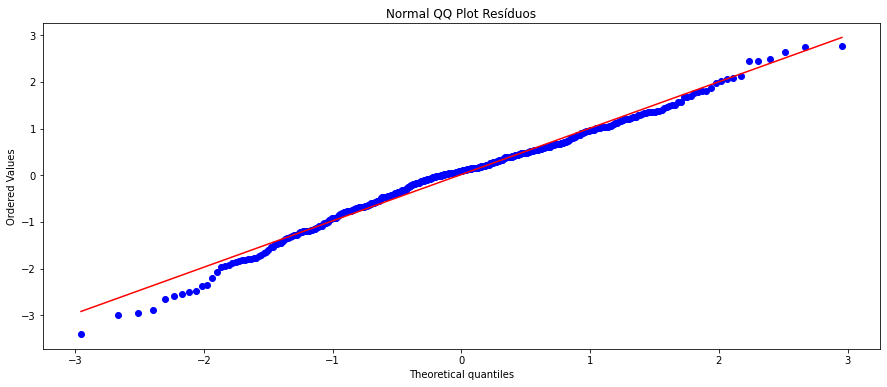

In [734]:
stats.probplot(residuos_auto(), dist='norm', plot=plt)
plt.title("Normal QQ Plot Resíduos")
plt.show()

In [735]:
e, p = stats.shapiro(residuos_auto())
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9870181679725647
P-Valor: 0.0005397823988460004


P-Valor menor doque 0.05, isto é, não é uma normal.

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


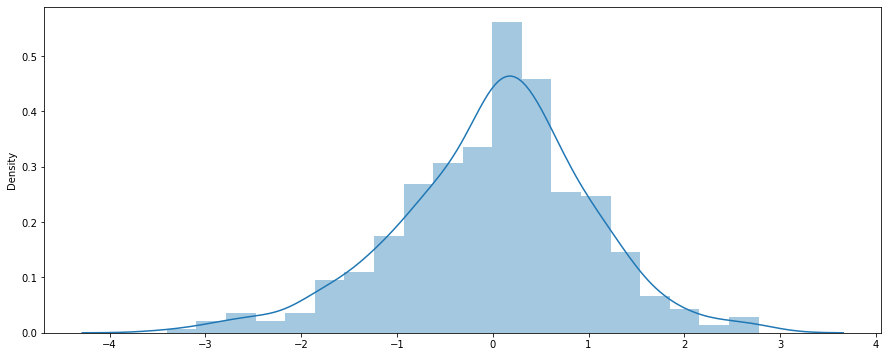

In [737]:
sns.distplot(residuos_auto());

## Autocorrelação

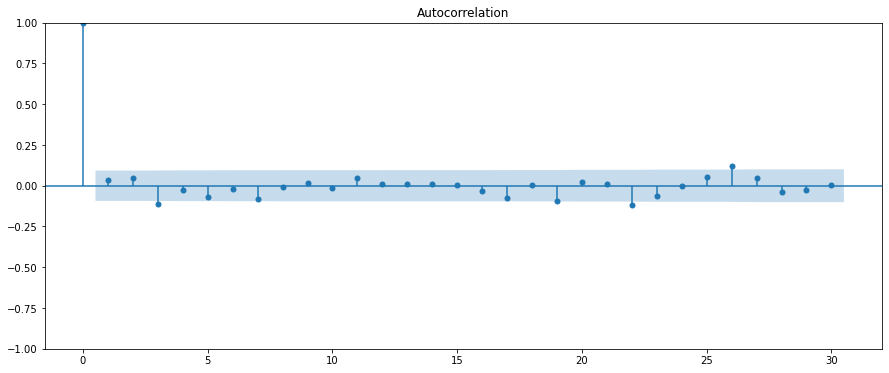

In [738]:
plot_acf(residuos_auto(), lags=30)
plt.show()

Uma clara ausência de autocorrelação entre os resíduos

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


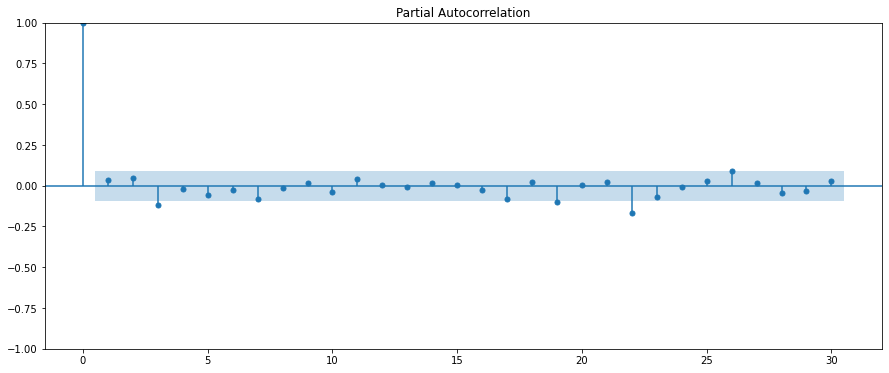

In [739]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

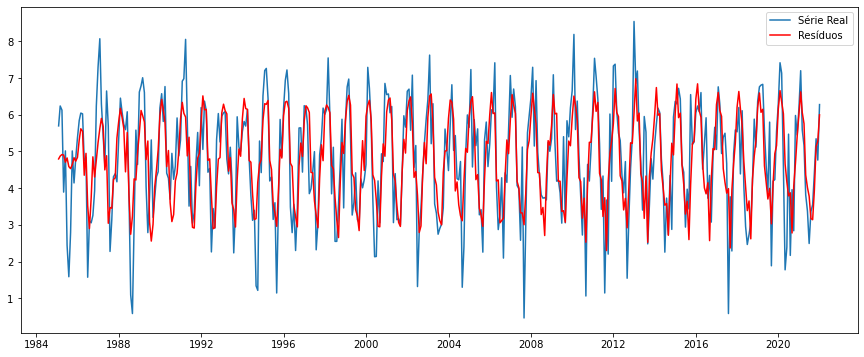

In [744]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_auto(), color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

## Previsão

In [812]:
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

2022-01-31    6.607090
2022-02-28    5.984399
2022-03-31    6.022658
2022-04-30    4.797643
2022-05-31    4.262578
2022-06-30    3.608186
2022-07-31    3.773041
2022-08-31    2.899514
2022-09-30    4.075819
2022-10-31    4.894841
2022-11-30    5.247571
2022-12-31    6.075091
Freq: M, dtype: float64

In [813]:
prev_escala_auto = pd.DataFrame(previsao_auto ** 3) # Voltar a escala normal do modelo SARIMA
prev_escala_auto

,0
2022-01-31,288.423516
2022-02-28,214.319434
2022-03-31,218.456284
2022-04-30,110.429166
2022-05-31,77.449199
2022-06-30,46.975001
2022-07-31,53.712412
2022-08-31,24.376741
2022-09-30,67.708750
2022-10-31,117.277818


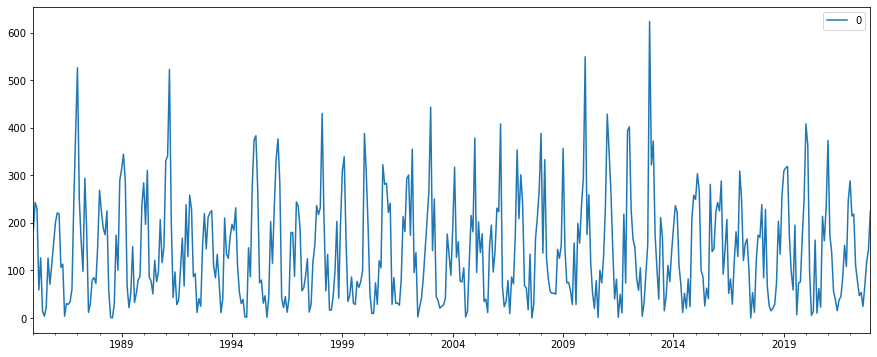

In [760]:
prev_escala_auto = prev_escala_auto.rename(columns={0: "previsão"})

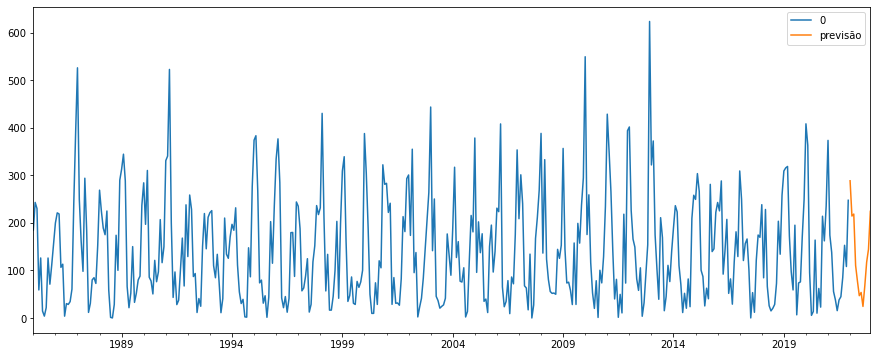

In [768]:
pd.concat([serie, prev_escala_auto]).plot();

***
# Conclusão - Análise Final do Projeto

**Comparação dos modelo:** <br>

Temos, com o modelo **MA(0,0,10): AIC = 1417,049**<br>
Temos, com o modelo **AR(10,0,0): AIC = 1336,687** <br>
Temos, com o modelo **ARMA(10,0,4): AIC = 1274.099** <br>
Temos, com o modelo **AUTO SARIMA(0,0,1)(3,0,1): AIC = 1262.512** <br>

## Desempenho dos modelos

In [834]:
# Lista com valores reais de 2022

lista = [418.4, 136.3, 233.6, 40.4, 67.3, 45.9, 8.8, 35.2, 131.2, 117.3, 197.7, 200.4]
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])

In [835]:
valores_reais

,valores reais
0,418.4
1,136.3
2,233.6
3,40.4
4,67.3
5,45.9
6,8.8
7,35.2
8,131.2
9,117.3


In [836]:
auto = prev_escala_auto.reset_index(drop = True)
auto

,0
0,288.423516
1,214.319434
2,218.456284
3,110.429166
4,77.449199
5,46.975001
6,53.712412
7,24.376741
8,67.708750
9,117.277818


In [837]:
desempenho = pd.concat([valores_reais, auto], axis=1)
desempenho

,valores reais,0
0,418.4,288.423516
1,136.3,214.319434
2,233.6,218.456284
3,40.4,110.429166
4,67.3,77.449199
5,45.9,46.975001
6,8.8,53.712412
7,35.2,24.376741
8,131.2,67.708750
9,117.3,117.277818


In [838]:
ar = prev_escala.reset_index(drop = True)
ar

,predicted_mean
0,239.437614
1,207.340163
2,143.609697
3,102.016291
4,70.758821
5,57.671394
6,51.399510
7,59.317409
8,81.002013
9,116.639709


In [839]:
ma = prev_escala_ma.reset_index(drop = True)
ma

,predicted_mean
0,186.699778
1,179.051557
2,147.113738
3,135.844538
4,117.656200
5,117.667018
6,108.033985
7,106.595074
8,112.208952
9,105.803822


In [840]:
arma = prev_escala_arma.reset_index(drop = True)
arma

,predicted_mean
0,257.219270
1,229.718893
2,168.018475
3,100.646331
4,52.747092
5,42.364500
6,34.874831
7,39.661047
8,77.372658
9,125.056006


In [841]:
arima = prev_escala_arima.reset_index(drop = True)
arima

,predicted_mean
0,225.870307
1,191.407579
2,119.324693
3,73.588163
4,39.744269
5,29.027403
6,26.726429
7,40.045891
8,75.683433
9,125.827137


In [846]:
final = pd.concat([desempenho, ar, ma, arma, arima], axis=1)
final.columns = ['Série Real', 'SARIMA', 'AR', 'MA', 'ARMA', 'ARIMA']
final

,Série Real,SARIMA,AR,MA,ARMA,ARIMA
0,418.4,288.423516,239.437614,186.699778,257.219270,225.870307
1,136.3,214.319434,207.340163,179.051557,229.718893,191.407579
2,233.6,218.456284,143.609697,147.113738,168.018475,119.324693
3,40.4,110.429166,102.016291,135.844538,100.646331,73.588163
4,67.3,77.449199,70.758821,117.656200,52.747092,39.744269
5,45.9,46.975001,57.671394,117.667018,42.364500,29.027403
6,8.8,53.712412,51.399510,108.033985,34.874831,26.726429
7,35.2,24.376741,59.317409,106.595074,39.661047,40.045891
8,131.2,67.708750,81.002013,112.208952,77.372658,75.683433
9,117.3,117.277818,116.639709,105.803822,125.056006,125.827137


## Erro Médio Absoluto (MAE)

In [847]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [849]:
print('Erro médio absoluto (MAE): ')
print(f"SARIMA: {mean_absolute_error(final['Série Real'], final['SARIMA'])}")
print(f"AR: {mean_absolute_error(final['Série Real'], final['AR'])}")
print(f"MA: {mean_absolute_error(final['Série Real'], final['MA'])}")
print(f"ARMA: {mean_absolute_error(final['Série Real'], final['ARMA'])}")
print(f"ARIMA: {mean_absolute_error(final['Série Real'], final['ARIMA'])}")

Erro médio absoluto (MAE): 
SARIMA: 41.72095749433753
AR: 50.04732157317621
MA: 79.60136172849177
ARMA: 46.89769969713236
ARIMA: 46.6088232813745


## Erro Quadrático Médio (MSE)

In [850]:
print('Erro médio absoluto (MAE): ')
print(f"SARIMA: {mean_squared_error(final['Série Real'], final['SARIMA'])}")
print(f"AR: {mean_squared_error(final['Série Real'], final['AR'])}")
print(f"MA: {mean_squared_error(final['Série Real'], final['MA'])}")
print(f"ARMA: {mean_squared_error(final['Série Real'], final['ARMA'])}")
print(f"ARIMA: {mean_squared_error(final['Série Real'], final['ARIMA'])}")

Erro médio absoluto (MAE): 
SARIMA: 3148.4077713600986
AR: 4708.429811477378
MA: 9220.521061594764
ARMA: 4134.465699906348
ARIMA: 4945.9800706705355


O melhor modelo, como visto ao longo de todo projeto, foi o SARIMA e, logo em seguida, o segundo melhor foi o ARMA.